In [1]:
%matplotlib inline


# Non-linear SVM

Perform binary classification using non-linear SVC
with RBF kernel. The target to predict is a XOR of the
inputs.

The color map illustrates the decision function learned by the SVC.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
# Visualize
print(X[0:10])
print(Y[0:10])

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]]
[False False  True  True  True False False False  True  True]


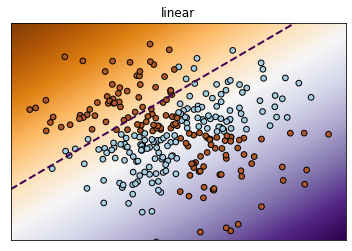

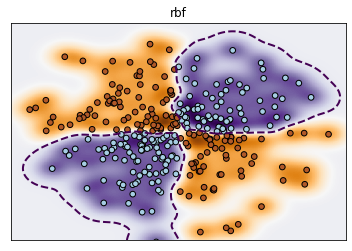

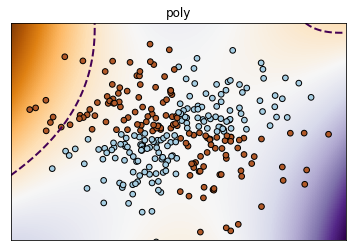

In [40]:
# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.clf()    
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
    plt.scatter(X[:, 0], X[:, 1], s=32, c=Y, cmap=plt.cm.Paired, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    
    plt.title(kernel)
plt.show()